In [1]:
from littlefish.core import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
simulation_folder = r"F:\little_fish_simulation_logs_3"
min_generation = 66
max_generation = 72

population_size = 1000
turnover_rate = 0.9

mother_fish_num = int(population_size * (1 - turnover_rate))

In [3]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000066, 1 / 7 ...
reading generation_0000067, 2 / 7 ...
reading generation_0000068, 3 / 7 ...
reading generation_0000069, 4 / 7 ...
reading generation_0000070, 5 / 7 ...
reading generation_0000071, 6 / 7 ...
reading generation_0000072, 7 / 7 ...


In [4]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
774,66,b'fish_241107_14_51_36.159836',54,False
325,66,b'fish_241107_14_51_14.869552',68,False
579,66,b'fish_241107_14_51_26.873964',73,False
429,66,b'fish_241107_14_51_19.703139',75,False
861,66,b'fish_241107_14_51_40.517137',76,False
...,...,...,...,...
4601,70,b'fish_241108_02_58_42.308173',39247,False
4408,70,b'fish_241108_02_58_32.395515',42021,False
6358,72,b'fish_241108_06_14_18.275817',42390,False
6587,72,b'fish_241108_06_14_29.915736',45814,False


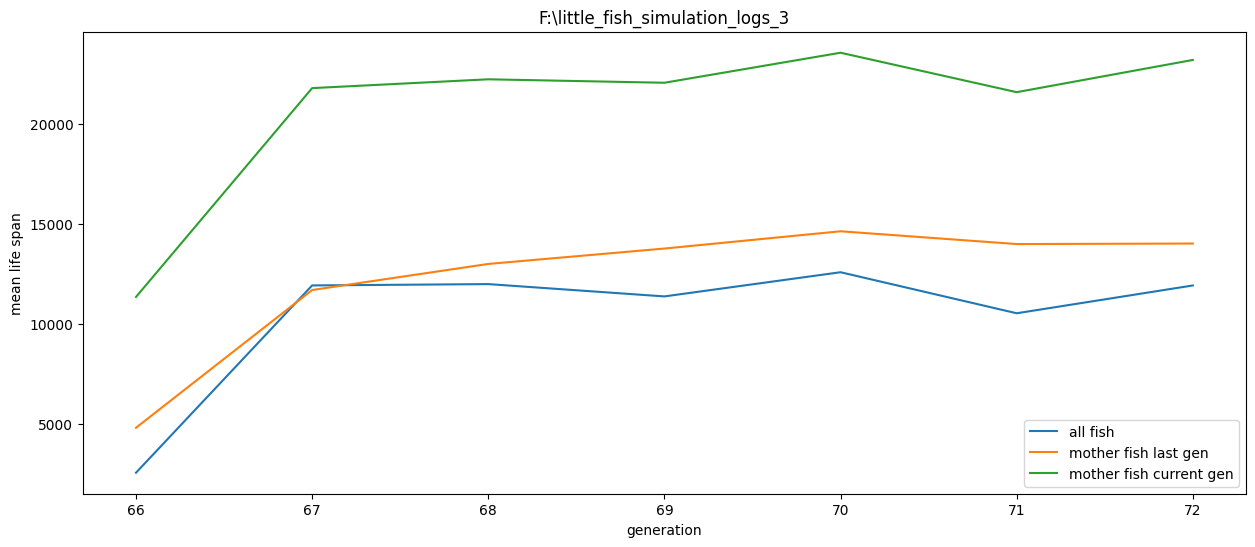

In [5]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()


(0.0, 20000.0)

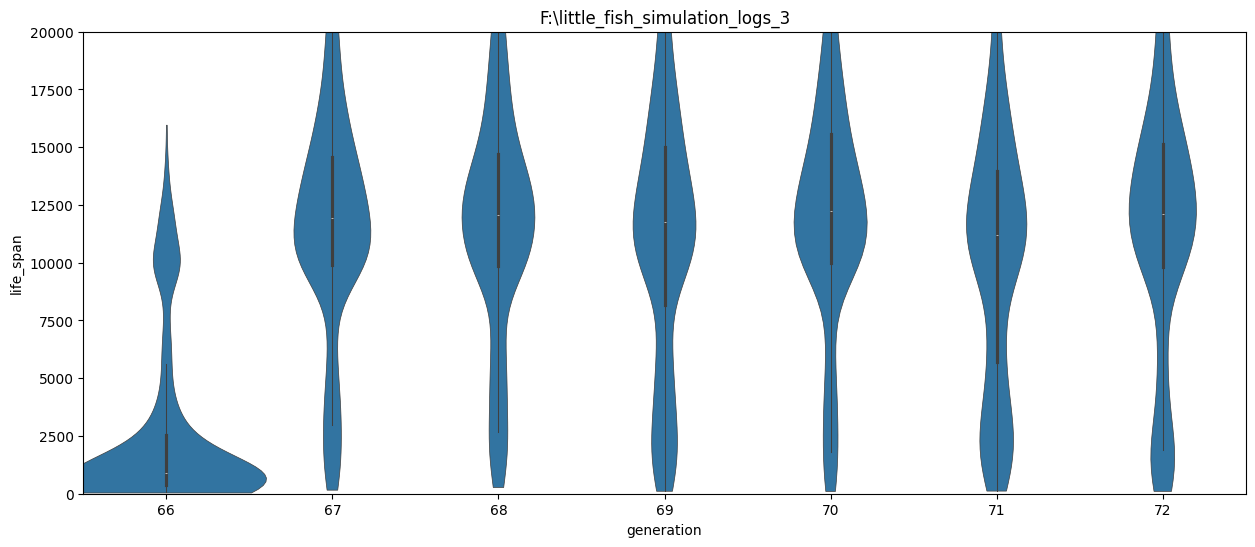

In [6]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5, width=1.2,
)
ax.set_ylim([0, 20000])

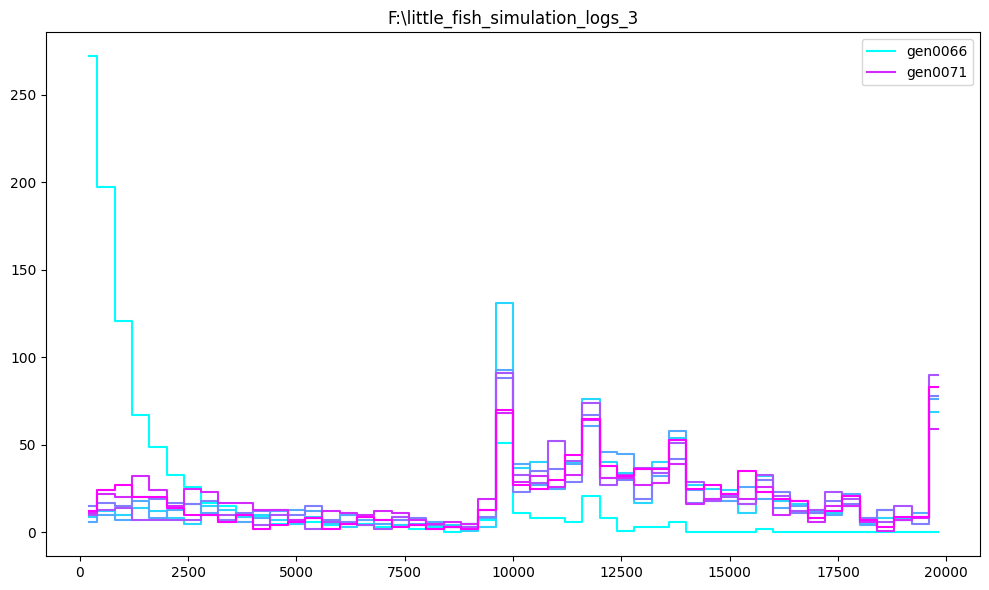

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=20000, bins=50, legend_gap=5,
)
ax.legend()
plt.tight_layout()